In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/road-sign-detection/annotations/road732.xml
/kaggle/input/road-sign-detection/annotations/road518.xml
/kaggle/input/road-sign-detection/annotations/road717.xml
/kaggle/input/road-sign-detection/annotations/road362.xml
/kaggle/input/road-sign-detection/annotations/road492.xml
/kaggle/input/road-sign-detection/annotations/road612.xml
/kaggle/input/road-sign-detection/annotations/road252.xml
/kaggle/input/road-sign-detection/annotations/road592.xml
/kaggle/input/road-sign-detection/annotations/road24.xml
/kaggle/input/road-sign-detection/annotations/road841.xml
/kaggle/input/road-sign-detection/annotations/road686.xml
/kaggle/input/road-sign-detection/annotations/road862.xml
/kaggle/input/road-sign-detection/annotations/road361.xml
/kaggle/input/road-sign-detection/annotations/road34.xml
/kaggle/input/road-sign-detection/annotations/road363.xml
/kaggle/input/road-sign-detection/annotations/road474.xml
/kaggle/input/road-sign-detection/annotations/road397.xml
/kaggle/input/ro

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16923, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 16923 (delta 57), reused 73 (delta 35), pack-reused 16805 (from 1)
Receiving objects: 100% (16923/16923), 15.69 MiB | 27.01 MiB/s, done.
Resolving deltas: 100% (11595/11595), done.


In [3]:
cd yolov5

/kaggle/working/yolov5


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 585.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 41.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


In [5]:
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd

In [6]:
input_path = '/kaggle/input/road-sign-detection'
output_path = '/kaggle/working/yolov5'

In [7]:
annotations_path = os.path.join(input_path, 'annotations')
annotations = os.listdir(annotations_path)

In [9]:
img_name_list = []
width_list = []
height_list = []
label_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []

for idx in tqdm(range(len(annotations))):

    tree = ET.parse(os.path.join(annotations_path, annotations[idx]))
    root = tree.getroot()

    img_name = root.find('filename').text
    
    
    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    for group in root.findall('object'):
        label = group.find('name').text
        bbox = group.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text
        
        img_name_list.append(img_name)
        width_list.append(width)
        height_list.append(height)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)
        label_list.append(label)

100%|██████████| 877/877 [00:02<00:00, 292.69it/s]


In [10]:
labels_df = pd.DataFrame({
                        'img_name': img_name_list, 
                        'width': width_list,
                        'height': height_list,
                        'xmin': xmin_list,
                        'ymin': ymin_list,
                        'xmax': xmax_list,
                        'ymax': ymax_list,
                        'label': label_list})
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label
0,road732.png,300,400,99,97,159,157,speedlimit
1,road732.png,300,400,104,189,165,250,speedlimit
2,road518.png,300,400,157,165,184,191,speedlimit
3,road717.png,300,400,90,219,109,240,speedlimit
4,road717.png,300,400,116,220,136,240,speedlimit


In [11]:
!pip install pybboxes

In [12]:
import numpy as np
import pandas as pd
import os
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil

In [13]:
classes = labels_df['label'].unique().tolist()
classes

['speedlimit', 'trafficlight', 'crosswalk', 'stop']

In [14]:
## Add class number associated to classes
labels_df['class'] = labels_df['label'].apply(lambda x: classes.index(x))
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label,class
0,road732.png,300,400,99,97,159,157,speedlimit,0
1,road732.png,300,400,104,189,165,250,speedlimit,0
2,road518.png,300,400,157,165,184,191,speedlimit,0
3,road717.png,300,400,90,219,109,240,speedlimit,0
4,road717.png,300,400,116,220,136,240,speedlimit,0


In [15]:
img_dict = defaultdict(list)

for idx in tqdm(range(len(labels_df))):
    sample_label_list = []
    img_name = labels_df.loc[idx, 'img_name']
    xmin = labels_df.loc[idx, 'xmin']
    ymin = labels_df.loc[idx, 'ymin']
    xmax = labels_df.loc[idx, 'xmax']
    ymax = labels_df.loc[idx, 'ymax']
    class_num = labels_df.loc[idx, 'class']
    W, H = int(labels_df.loc[idx, 'width']), int(labels_df.loc[idx, 'height'])

    voc_bbox = (int(xmin), int(ymin) ,int(xmax), int(ymax))
    
    x_center, y_center, w, h = pbx.convert_bbox(voc_bbox, from_type="voc", to_type="yolo", image_size=(W,H))

    sample_label_list.append(str(class_num))
    sample_label_list.append(str(x_center))
    sample_label_list.append(str(y_center))
    sample_label_list.append(str(w))
    sample_label_list.append(str(h))
    line = ' '.join(sample_label_list)

    img_dict[img_name].append(line)

100%|██████████| 1244/1244 [00:00<00:00, 4553.65it/s]


In [16]:
# make labels dir in data folder of yolov5
labels_dir = f'{output_path}/data/labels'
if os.path.exists(labels_dir):
    shutil.rmtree(labels_dir)
os.mkdir(labels_dir)

In [17]:
## Generate .txt file for each image
for img_name, lines in img_dict.items():
    img_name = img_name.split('.')[0]
    with open(f'{labels_dir}/{img_name}.txt', 'w') as f:
        for line in lines:
            f.write(line)
            f.write('\n')

In [18]:
import os
import shutil
from random import shuffle

In [19]:
images_path = input_path + '/images'
labels_path = labels_dir

In [20]:
# create train , val folders in data directory of yolov5
train_dir = output_path + '/data/train'
val_dir = output_path + '/data/val'

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
    
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
    
os.mkdir(train_dir)
os.mkdir(val_dir)

# train, val each containing images and labels folders
os.mkdir(train_dir + '/images')
os.mkdir(train_dir + '/labels')
os.mkdir(val_dir + '/images')
os.mkdir(val_dir + '/labels')

In [21]:
# Shuffle image file names before splitting into train and val data
files = os.listdir(images_path)
shuffle(files)

In [22]:
images_path, labels_path, train_dir

('/kaggle/input/road-sign-detection/images',
 '/kaggle/working/yolov5/data/labels',
 '/kaggle/working/yolov5/data/train')

In [23]:
def split(files, ratio):
    elements = len(files)
    middle = int(elements * ratio)
    return [files[:middle], files[middle:]]

def copy_files(images_path, labels_path, destination_path, files):
    
    for file_name in files:
        file_name = file_name.split('.')[0]

        src = images_path + f'/{file_name}.png'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

        src = labels_path + f'/{file_name}.txt'
        dst = destination_path + '/labels'
        shutil.copy(src, dst)

In [24]:
# Split and copy files in train and val folder
train_ratio = 0.75
train_files, val_files = split(files, train_ratio)

root = 'data/traffic_sign_data'

copy_files(images_path, labels_path, train_dir, train_files)
copy_files(images_path, labels_path, val_dir, val_files)

In [25]:
assert (len(os.listdir(train_dir + '/images')) + len(os.listdir(val_dir + '/images')) == len(os.listdir(images_path)))

In [26]:
with open(f'{output_path}/data/sign_data.yaml', 'w') as f:
    f.write('train: ../data/train/images\n')
    f.write('val: ../data/val/images\n')
    f.write('nc: 4\n')
    f.write(f"names: {classes}")

In [27]:
epochs = 25
!python train.py --img 640 --batch 16 --epochs {epochs} --data sign_data.yaml --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=sign_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, n

In [28]:
# results stored in runs/train 
# get the last stored result
exp = sorted(os.listdir(output_path + '/runs/train'))[-1]
exp_path = output_path + '/runs/train/' + exp

In [29]:
os.listdir(exp_path)

['train_batch2.jpg',
 'val_batch2_pred.jpg',
 'PR_curve.png',
 'events.out.tfevents.1724684780.9a7aba9ff482.188.0',
 'val_batch0_labels.jpg',
 'val_batch1_pred.jpg',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'opt.yaml',
 'confusion_matrix.png',
 'results.csv',
 'val_batch2_labels.jpg',
 'train_batch0.jpg',
 'R_curve.png',
 'hyp.yaml',
 'results.png',
 'F1_curve.png',
 'train_batch1.jpg',
 'weights',
 'val_batch1_labels.jpg',
 'P_curve.png',
 'labels_correlogram.jpg']

In [30]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

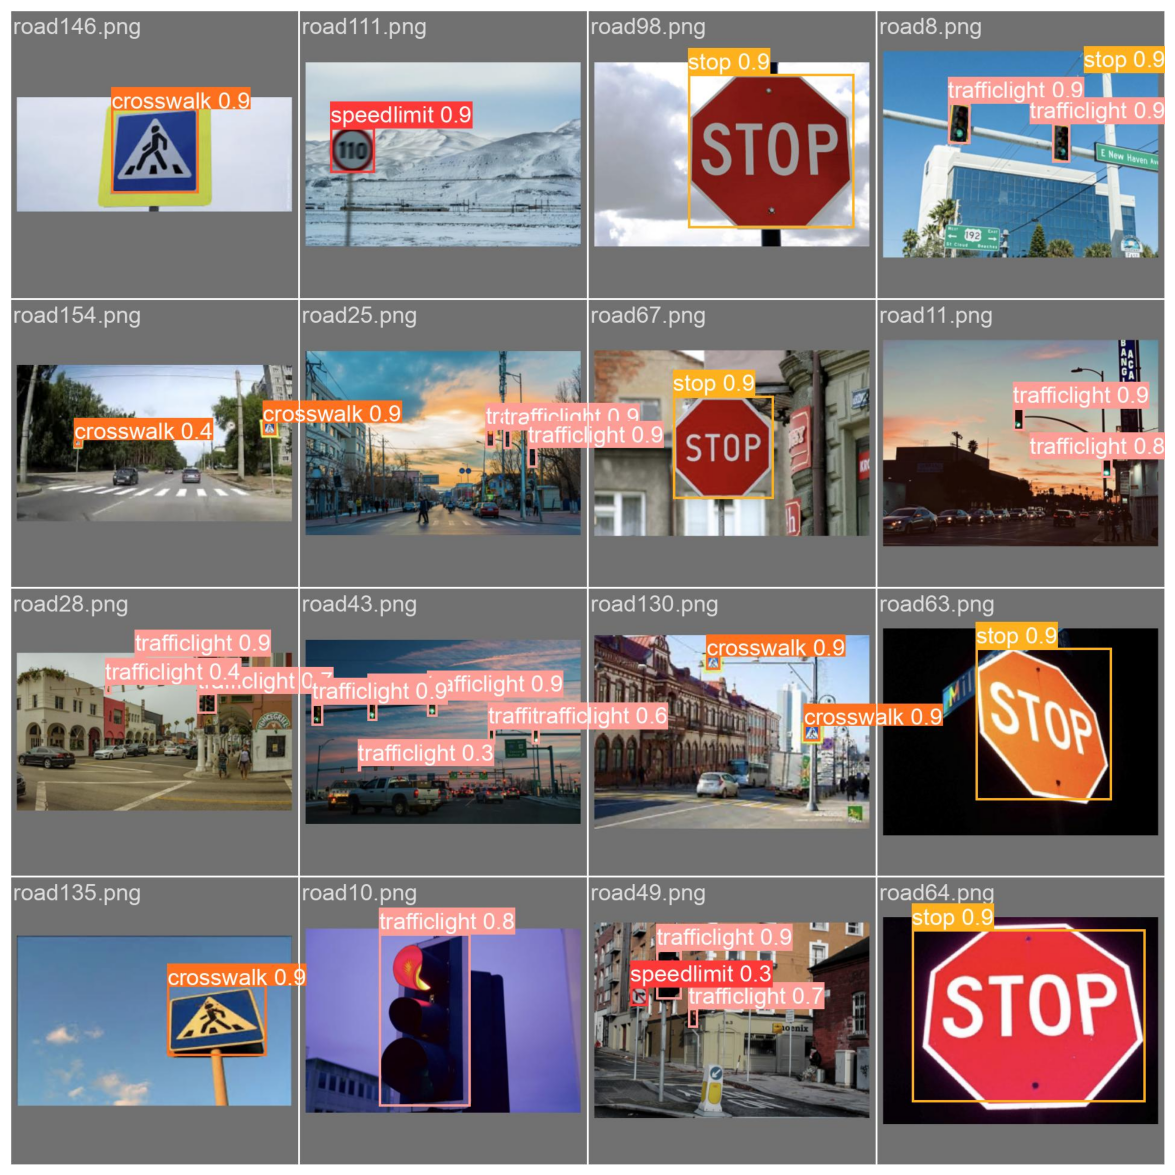

In [31]:
img = cv2.imread('/kaggle/working/yolov5/runs/train/exp/val_batch0_pred.jpg')
imag = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(imag)
plt.axis('off')
plt.show()